In [1]:
# Import MalthusJAX components
from malthusjax.core.genome.binary import BinaryGenome, BinaryGenomeConfig
from malthusjax.core.fitness.binary_ones import BinarySumFitnessEvaluator
from malthusjax.operators.selection.tournament import TournamentSelection
from malthusjax.operators.crossover.binary import UniformCrossover
from malthusjax.operators.mutation.binary import BitFlipMutation

print("✅ MalthusJAX components imported successfully")

# Setup GA configuration
pop_size = 100
elitism = 5
num_offspring = pop_size - elitism

# Define components
genome_config = BinaryGenome(array_shape=(100,), p=0.2)
fitness_evaluator = BinarySumFitnessEvaluator()
selector = TournamentSelection(number_of_choices=num_offspring, tournament_size=3)
crossover = UniformCrossover(crossover_rate=0.8, n_outputs=1)
mutator = BitFlipMutation(mutation_rate=0.05)

components = {
    'genome_representation': genome_config,
    'fitness_evaluator': fitness_evaluator,
    'selection_operator': selector,
    'crossover_operator': crossover,
    'mutation_operator': mutator,
    'elitism': elitism
}

print(f"🧬 GA Configuration:")
print(f"  Problem: Maximize sum of {genome_config.array_shape[0]} bits")
print(f"  Population size: {pop_size}")
print(f"  Elitism: {elitism}")
print(f"  Selection: Tournament (size={selector.tournament_size})")
print(f"  Crossover: Uniform (rate={crossover.crossover_rate})")
print(f"  Mutation: Bit flip (rate={mutator.mutation_rate})")

✅ MalthusJAX components imported successfully
🧬 GA Configuration:
  Problem: Maximize sum of 100 bits
  Population size: 100
  Elitism: 5
  Selection: Tournament (size=3)
  Crossover: Uniform (rate=0.8)
  Mutation: Bit flip (rate=0.05)


In [2]:
from malthusjax.engine.ResearchEngine import ResearchEngine
import jax.random as jar
research_engine = ResearchEngine( **components)

research_final_state, research_intermediates = research_engine.run(
        key=jar.PRNGKey(10),
        num_generations=200,
        pop_size=pop_size
    )

print(type(research_intermediates)) # <class 'malthusjax.engine.ResearchEngine.FullIntermediateState'>
print(type(research_final_state)) # ResearchState


<class 'malthusjax.engine.ResearchEngine.FullIntermediateState'>
<class 'malthusjax.engine.ResearchEngine.ResearchState'>


In [3]:
research_intermediates.best_fitness

Array([33, 36, 42, 46, 49, 54, 60, 62, 67, 70, 71, 74, 76, 78, 78, 80, 80,
       80, 82, 82, 82, 88, 88, 88, 88, 88, 88, 88, 88, 88, 89, 91, 91, 91,
       91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 92, 93,
       93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 94, 94,
       94, 94, 94, 94, 94, 94, 94, 94, 94, 96, 96, 96, 96, 96, 96, 96, 96,
       96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
       96, 96, 96, 96, 96, 96, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98,
       98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98,
       98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98,
       98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98,
       98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98,
       98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98], dtype=int32)

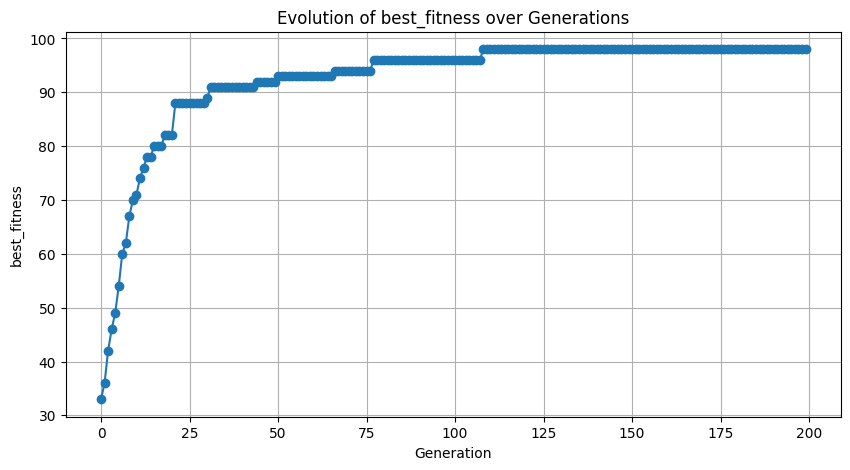

{'best_fitness_mean': Array(92.56, dtype=float32), 'best_fitness_std': Array(10.880093, dtype=float32), 'best_fitness_min': Array(33, dtype=int32), 'best_fitness_max': Array(98, dtype=int32)}


In [4]:
# let's make a function that, given the intermediates, extracts execution times and KPI results
import jax.numpy as jnp
import matplotlib.pyplot as plt

def extract_history_metrics(intermediates, metric_name: str = 'best_fitness'):
    try:
        history_metrics = getattr(intermediates, metric_name, None)
    except AttributeError:
        raise ValueError(f"Metric '{metric_name}' not found in intermediates.")
    metric_infodict = {
        f'{metric_name}_mean': jnp.mean(history_metrics),
        f'{metric_name}_std': jnp.std(history_metrics),
        f'{metric_name}_min': jnp.min(history_metrics),
        f'{metric_name}_max': jnp.max(history_metrics),
    }
    return history_metrics, metric_infodict

def plot_metric_analysis(intermediates, metric_name: str = 'best_fitness'):
    history_metrics, metric_infodict = extract_history_metrics(intermediates, metric_name)
    
    plt.figure(figsize=(10, 5))
    plt.plot(history_metrics, marker='o')
    plt.title(f'Evolution of {metric_name} over Generations')
    plt.xlabel('Generation')
    plt.ylabel(metric_name)
    plt.grid(True)
    plt.show()
    
    return metric_infodict

metric_info = plot_metric_analysis(research_intermediates, metric_name='best_fitness')
print(metric_info)

# multiple run study with kpi tracking


In [16]:
n_runs = 30
metric_info_list = []
for i in range(n_runs):
    print(f"--- Run {i+1}/{n_runs} ---")
    research_final_state, research_intermediates = research_engine.run(
        key=jar.PRNGKey(i),
        num_generations=200,
        pop_size=pop_size
    )
    metric_info = extract_history_metrics(research_intermediates, metric_name='best_fitness')
    metric_info_list.append(metric_info)

--- Run 1/30 ---
--- Run 2/30 ---
--- Run 2/30 ---
--- Run 3/30 ---
--- Run 3/30 ---
--- Run 4/30 ---
--- Run 4/30 ---
--- Run 5/30 ---
--- Run 5/30 ---
--- Run 6/30 ---
--- Run 6/30 ---
--- Run 7/30 ---
--- Run 7/30 ---
--- Run 8/30 ---
--- Run 8/30 ---
--- Run 9/30 ---
--- Run 9/30 ---
--- Run 10/30 ---
--- Run 10/30 ---
--- Run 11/30 ---
--- Run 11/30 ---
--- Run 12/30 ---
--- Run 12/30 ---
--- Run 13/30 ---
--- Run 13/30 ---
--- Run 14/30 ---
--- Run 14/30 ---
--- Run 15/30 ---
--- Run 15/30 ---
--- Run 16/30 ---
--- Run 16/30 ---
--- Run 17/30 ---
--- Run 17/30 ---
--- Run 18/30 ---
--- Run 18/30 ---
--- Run 19/30 ---
--- Run 19/30 ---
--- Run 20/30 ---
--- Run 20/30 ---
--- Run 21/30 ---
--- Run 21/30 ---
--- Run 22/30 ---
--- Run 22/30 ---
--- Run 23/30 ---
--- Run 23/30 ---
--- Run 24/30 ---
--- Run 24/30 ---
--- Run 25/30 ---
--- Run 25/30 ---
--- Run 26/30 ---
--- Run 26/30 ---
--- Run 27/30 ---
--- Run 27/30 ---
--- Run 28/30 ---
--- Run 28/30 ---
--- Run 29/30 ---
--- Run 2

In [17]:
metric_info_list[2][0]

Array([30, 38, 42, 44, 49, 52, 55, 61, 63, 65, 71, 73, 73, 76, 78, 81, 81,
       81, 81, 82, 83, 83, 83, 84, 85, 86, 86, 86, 86, 86, 89, 89, 90, 90,
       90, 90, 90, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
       91, 91, 91, 91, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93,
       93, 93, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
       95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 96, 97, 97, 97, 97, 97, 97,
       97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97,
       97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97,
       97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 98,
       98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98,
       98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98,
       98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98], dtype=int32)

In [18]:
def extract_kpi_over_runs(metric_info_list, kpi_name: str = 'best_fitness_mean'):
    #create a matrix of shape (n_runs, num_generations)
    history_matrix = jnp.array([info[0] for info in metric_info_list])
    return history_matrix

history_matrix = extract_kpi_over_runs(metric_info_list, kpi_name='best_fitness')
history_matrix.shape  # (n_runs, num_generations)

(30, 200)

<Axes: title={'center': 'Spaghetti Plot of Best Fitness over Generations'}, xlabel='Generation', ylabel='Best Fitness'>

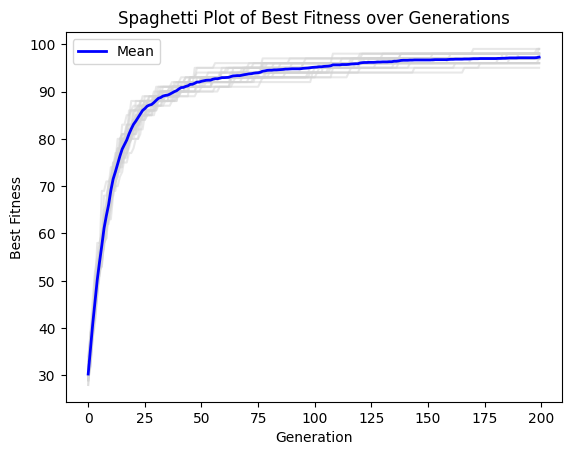

In [19]:
#%pip install scikit-fda

# --- Core Data Handling & Numerics ---
import numpy as np
import pandas as pd

# --- Functional Data Analysis (fPCA) ---
from skfda.representation import FDataGrid # 1D functional data representation
from skfda.representation.basis import BSpline # B-spline basis functions
from skfda.preprocessing.smoothing import BasisSmoother # Smoothing functional data
from skfda.preprocessing.dim_reduction import FPCA # Functional Principal Component Analysis
# --- Statistical Testing ---
from scipy.stats import mannwhitneyu

# --- Plotting ---
import matplotlib.pyplot as plt
import seaborn as sns

def _plot_spaghetti(ax, fd_grid_a: np.ndarray,
                    metric_name: str = 'Best Fitness'):
    """Helper to draw the spaghetti plot."""
    n_runs, n_generations = fd_grid_a.shape
    for run_idx in range(n_runs):
        ax.plot(range(n_generations), fd_grid_a[run_idx, :],
                color='lightgray', alpha=0.5)
    # Add mean line
    mean_values = jnp.mean(fd_grid_a, axis=0)
    ax.plot(range(n_generations), mean_values,
            color='blue', linewidth=2, label='Mean')
    ax.set_title(f'Spaghetti Plot of {metric_name} over Generations')
    ax.set_xlabel('Generation')
    ax.set_ylabel(metric_name)
    ax.legend()
    return ax

_plot_spaghetti(
    plt.gca(),
    history_matrix,
    metric_name='Best Fitness'
)
    
        

    

<Axes: title={'center': 'Mean Curve of Best Fitness over Generations'}, xlabel='Generation', ylabel='Best Fitness'>

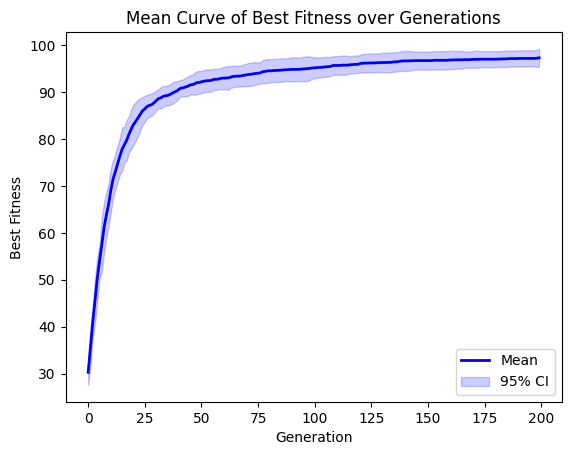

In [20]:
def _plot_mean_curve(ax, fd_grid_a,
                     metric_name: str = 'Best Fitness'):
    """Helper to draw the mean curve with confidence intervals."""
    mean_values = jnp.mean(fd_grid_a, axis=0)
    std_values = jnp.std(fd_grid_a, axis=0)
    n_generations = fd_grid_a.shape[1]
    
    ax.plot(range(n_generations), mean_values,
            color='blue', linewidth=2, label='Mean')
    ax.fill_between(range(n_generations),
                    mean_values - 1.96 * std_values,
                    mean_values + 1.96 * std_values,
                    color='blue', alpha=0.2, label='95% CI')
    ax.set_title(f'Mean Curve of {metric_name} over Generations')
    ax.set_xlabel('Generation')
    ax.set_ylabel(metric_name)
    ax.legend()
    return ax

_plot_mean_curve(
    plt.gca(),
    history_matrix,
    metric_name='Best Fitness'
)

In [21]:
from skfda.representation.basis import BSplineBasis

# --- Functional Data Analysis (fPCA) & Statistical Testing ---
def perform_fpca_and_stat_test(fd_grid_a: np.ndarray,
                               metric_name: str = 'Best Fitness'):
    """Performs fPCA on the functional data and statistical testing.
    
    Args:
        fd_grid_a: np.ndarray
            Functional data array of shape (n_runs, n_generations).
        metric_name: str
            Name of the metric being analyzed.
    Returns:
        A dictionary containing analysis results:
        {
            "p_value_fpc": float,
            "variance_explained": np.ndarray,
            "fpc_scores": pd.DataFrame,
            "fpca_model": FPCA object
        }
    """
    # Convert to functional data object
    fd_grid = FDataGrid(fd_grid_a)
    
    # Create B-spline basis for smoothing (updated to avoid deprecation)
    basis = BSplineBasis(n_basis=5, order=3)
    smoother = BasisSmoother(basis)
    fd_smoothed = smoother.fit_transform(fd_grid)
    
    # Perform fPCA
    fpca = FPCA(n_components=3)
    fpca.fit(fd_smoothed)
    
    # Extract variance explained
    variance_explained = fpca.explained_variance_ratio_
    
    # Transform data to get scores
    scores = fpca.transform(fd_smoothed)
    fpc_scores = pd.DataFrame(
        scores,
        columns=[f'PC{i+1}' for i in range(scores.shape[1])]
    )
    
    # Mann-Whitney U test on PC1 scores (first half vs second half of runs)
    n_runs = scores.shape[0]
    mid_point = n_runs // 2
    pc1_first = scores[:mid_point, 0]
    pc1_second = scores[mid_point:, 0]
    
    stat, p_value_fpc = mannwhitneyu(pc1_first, pc1_second, alternative='two-sided')
    
    return {
        "p_value_fpc": p_value_fpc,
        "variance_explained": variance_explained,
        "fpc_scores": fpc_scores,
        "fpca_model": fpca
    }
    
results = perform_fpca_and_stat_test(
    history_matrix,
    metric_name='Best Fitness'
)

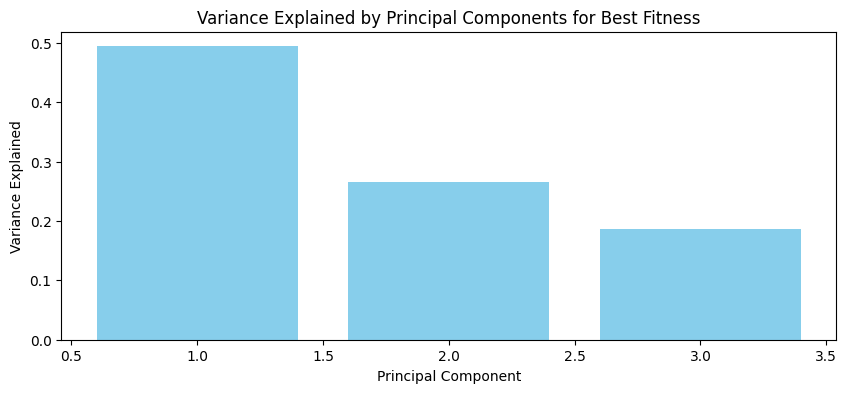

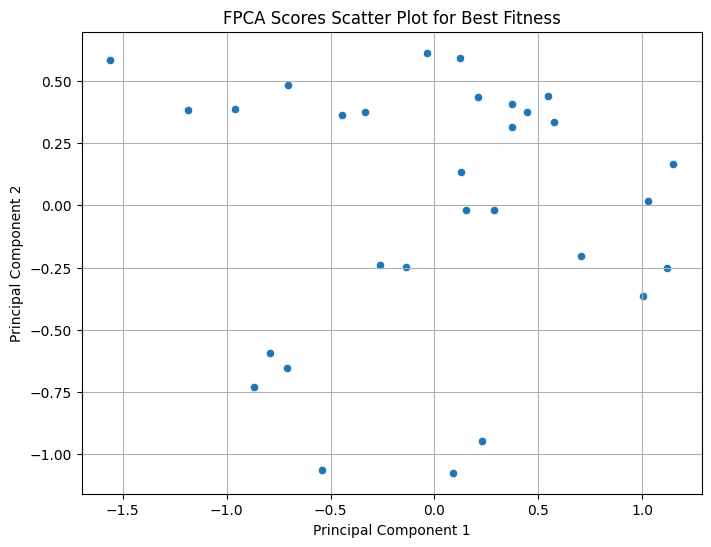

In [22]:
def _plot_fpca_results(fpca_model, fpc_scores, metric_name: str = 'Best Fitness'):
    """Helper to plot fPCA results."""
    # Plot explained variance
    plt.figure(figsize=(10, 4))
    plt.bar(range(1, len(fpca_model.explained_variance_ratio_)+1),
            fpca_model.explained_variance_ratio_,
            color='skyblue')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    plt.title(f'Variance Explained by Principal Components for {metric_name}')
    plt.show()
    
    # Scatter plot of first two principal components
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', data=fpc_scores)
    plt.title(f'FPCA Scores Scatter Plot for {metric_name}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()
    
_plot_fpca_results(
    results['fpca_model'],
    results['fpc_scores'],
    metric_name='Best Fitness'
)


In [23]:
def detect_premature_convergence_fpca(fd_grid_a: np.ndarray, 
                                       convergence_threshold: float = 0.01,
                                       min_stagnation_generations: int = 5,
                                       metric_name: str = 'Best Fitness'):
    """
    Detect premature convergence using fPCA analysis.
    
    The idea is to:
    1. Use fPCA to capture the main patterns of variation across runs
    2. Analyze the derivatives/slopes of the principal components 
    3. Identify when curves flatten out (indicating convergence)
    4. Compare early vs late convergence patterns
    
    Args:
        fd_grid_a: Functional data array (n_runs, n_generations)
        convergence_threshold: Threshold for detecting slope flattening
        min_stagnation_generations: Minimum consecutive flat generations
        metric_name: Name of the metric
    
    Returns:
        Dictionary with convergence analysis results
    """
    n_runs, n_generations = fd_grid_a.shape
    
    # Convert to functional data and smooth
    fd_grid = FDataGrid(fd_grid_a)
    basis = BSplineBasis(n_basis=max(5, n_generations//4), order=3)
    smoother = BasisSmoother(basis)
    fd_smoothed = smoother.fit_transform(fd_grid)
    
    # Perform fPCA
    fpca = FPCA(n_components=min(5, n_runs//2))
    fpca.fit(fd_smoothed)
    
    # Get the mean function and principal components
    mean_function = fpca.mean_
    components = fpca.components_
    
    # Calculate derivatives of the mean function to detect stagnation
    generation_points = np.arange(n_generations)
    mean_values = mean_function(generation_points).flatten()
    
    # Calculate rolling slopes (derivatives)
    window_size = 3
    slopes = []
    for i in range(window_size, len(mean_values)):
        slope = np.polyfit(generation_points[i-window_size:i+1], 
                          mean_values[i-window_size:i+1], 1)[0]
        slopes.append(slope)
    
    slopes = np.array(slopes)
    
    # Detect convergence points where slope is consistently low
    convergence_mask = np.abs(slopes) < convergence_threshold
    
    # Find consecutive periods of stagnation
    stagnation_periods = []
    current_start = None
    
    for i, is_stagnant in enumerate(convergence_mask):
        if is_stagnant and current_start is None:
            current_start = i + window_size  # Adjust for window offset
        elif not is_stagnant and current_start is not None:
            if i + window_size - current_start >= min_stagnation_generations:
                stagnation_periods.append((current_start, i + window_size))
            current_start = None
    
    # Handle case where stagnation continues to the end
    if current_start is not None:
        if n_generations - current_start >= min_stagnation_generations:
            stagnation_periods.append((current_start, n_generations))
    
    # Identify premature convergence (early stagnation)
    premature_convergence = None
    if stagnation_periods:
        # Consider convergence "premature" if it happens in first 70% of generations
        premature_threshold = int(0.7 * n_generations)
        for start, end in stagnation_periods:
            if start < premature_threshold:
                premature_convergence = (start, end)
                break
    
    # Analyze PC scores to identify runs with different convergence patterns
    scores = fpca.transform(fd_smoothed)
    
    # Use PC1 scores to cluster runs by convergence behavior
    pc1_scores = scores[:, 0]
    pc1_median = np.median(pc1_scores)
    
    early_converging_runs = np.where(pc1_scores < pc1_median)[0]
    late_converging_runs = np.where(pc1_scores >= pc1_median)[0]
    
    # Calculate convergence statistics for each group
    early_conv_data = fd_grid_a[early_converging_runs]
    late_conv_data = fd_grid_a[late_converging_runs]
    
    return {
        "premature_convergence_period": premature_convergence,
        "stagnation_periods": stagnation_periods,
        "mean_slopes": slopes,
        "convergence_generation": premature_convergence[0] if premature_convergence else None,
        "early_converging_runs": early_converging_runs,
        "late_converging_runs": late_converging_runs,
        "pc1_scores": pc1_scores,
        "variance_explained": fpca.explained_variance_ratio_,
        "fpca_model": fpca,
        "mean_function_values": mean_values
    }
    
convergence_results = detect_premature_convergence_fpca(
    history_matrix,
    convergence_threshold=0.001,
    min_stagnation_generations=5,
    metric_name='Best Fitness'
)

In [24]:
def plot_convergence_analysis(convergence_results, fd_grid_a: np.ndarray, 
                             metric_name: str = 'Best Fitness'):
    """
    Visualize the convergence analysis results.
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plot 1: Mean trajectory with convergence periods highlighted
    ax1 = axes[0, 0]
    n_generations = fd_grid_a.shape[1]
    generations = np.arange(n_generations)
    mean_values = convergence_results['mean_function_values']
    
    ax1.plot(generations, mean_values, 'b-', linewidth=2, label='Mean trajectory')
    
    # Highlight stagnation periods
    for start, end in convergence_results['stagnation_periods']:
        ax1.axvspan(start, end, alpha=0.3, color='red', 
                   label='Stagnation' if start == convergence_results['stagnation_periods'][0][0] else "")
    
    # Mark premature convergence
    if convergence_results['premature_convergence_period']:
        start, end = convergence_results['premature_convergence_period']
        ax1.axvspan(start, end, alpha=0.5, color='orange', 
                   label=f'Premature Convergence (Gen {start})')
    
    ax1.set_xlabel('Generation')
    ax1.set_ylabel(metric_name)
    ax1.set_title('Mean Trajectory with Convergence Analysis')
    ax1.legend()
    ax1.grid(True)
    
    # Plot 2: Slopes over time
    ax2 = axes[0, 1]
    slope_generations = np.arange(3, len(convergence_results['mean_slopes']) + 3)
    ax2.plot(slope_generations, convergence_results['mean_slopes'], 'g-', linewidth=1)
    ax2.axhline(y=0.01, color='r', linestyle='--', alpha=0.7, label='Convergence threshold')
    ax2.axhline(y=-0.01, color='r', linestyle='--', alpha=0.7)
    ax2.set_xlabel('Generation')
    ax2.set_ylabel('Slope (rate of change)')
    ax2.set_title('Rate of Improvement Over Time')
    ax2.legend()
    ax2.grid(True)
    
    # Plot 3: PC1 scores showing run clustering
    ax3 = axes[1, 0]
    pc1_scores = convergence_results['pc1_scores']
    early_runs = convergence_results['early_converging_runs']
    late_runs = convergence_results['late_converging_runs']
    
    ax3.scatter(early_runs, pc1_scores[early_runs], 
               color='red', alpha=0.7, label='Early converging runs')
    ax3.scatter(late_runs, pc1_scores[late_runs], 
               color='blue', alpha=0.7, label='Late converging runs')
    ax3.set_xlabel('Run Index')
    ax3.set_ylabel('PC1 Score')
    ax3.set_title('Run Clustering by Convergence Pattern')
    ax3.legend()
    ax3.grid(True)
    
    # Plot 4: Comparison of early vs late converging trajectories
    ax4 = axes[1, 1]
    early_data = fd_grid_a[early_runs]
    late_data = fd_grid_a[late_runs]
    
    early_mean = np.mean(early_data, axis=0)
    late_mean = np.mean(late_data, axis=0)
    early_std = np.std(early_data, axis=0)
    late_std = np.std(late_data, axis=0)
    
    ax4.plot(generations, early_mean, 'r-', linewidth=2, label='Early converging (mean)')
    ax4.fill_between(generations, early_mean - early_std, early_mean + early_std,
                    color='red', alpha=0.2)
    
    ax4.plot(generations, late_mean, 'b-', linewidth=2, label='Late converging (mean)')
    ax4.fill_between(generations, late_mean - late_std, late_mean + late_std,
                    color='blue', alpha=0.2)
    
    ax4.set_xlabel('Generation')
    ax4.set_ylabel(metric_name)
    ax4.set_title('Early vs Late Converging Runs')
    ax4.legend()
    ax4.grid(True)
    
    plt.tight_layout()
    plt.show()

# Apply the convergence analysis
convergence_results = detect_premature_convergence_fpca(
    history_matrix,
    convergence_threshold=0.5,  # Adjust based on your problem scale
    min_stagnation_generations=3,
    metric_name='Best Fitness'
)

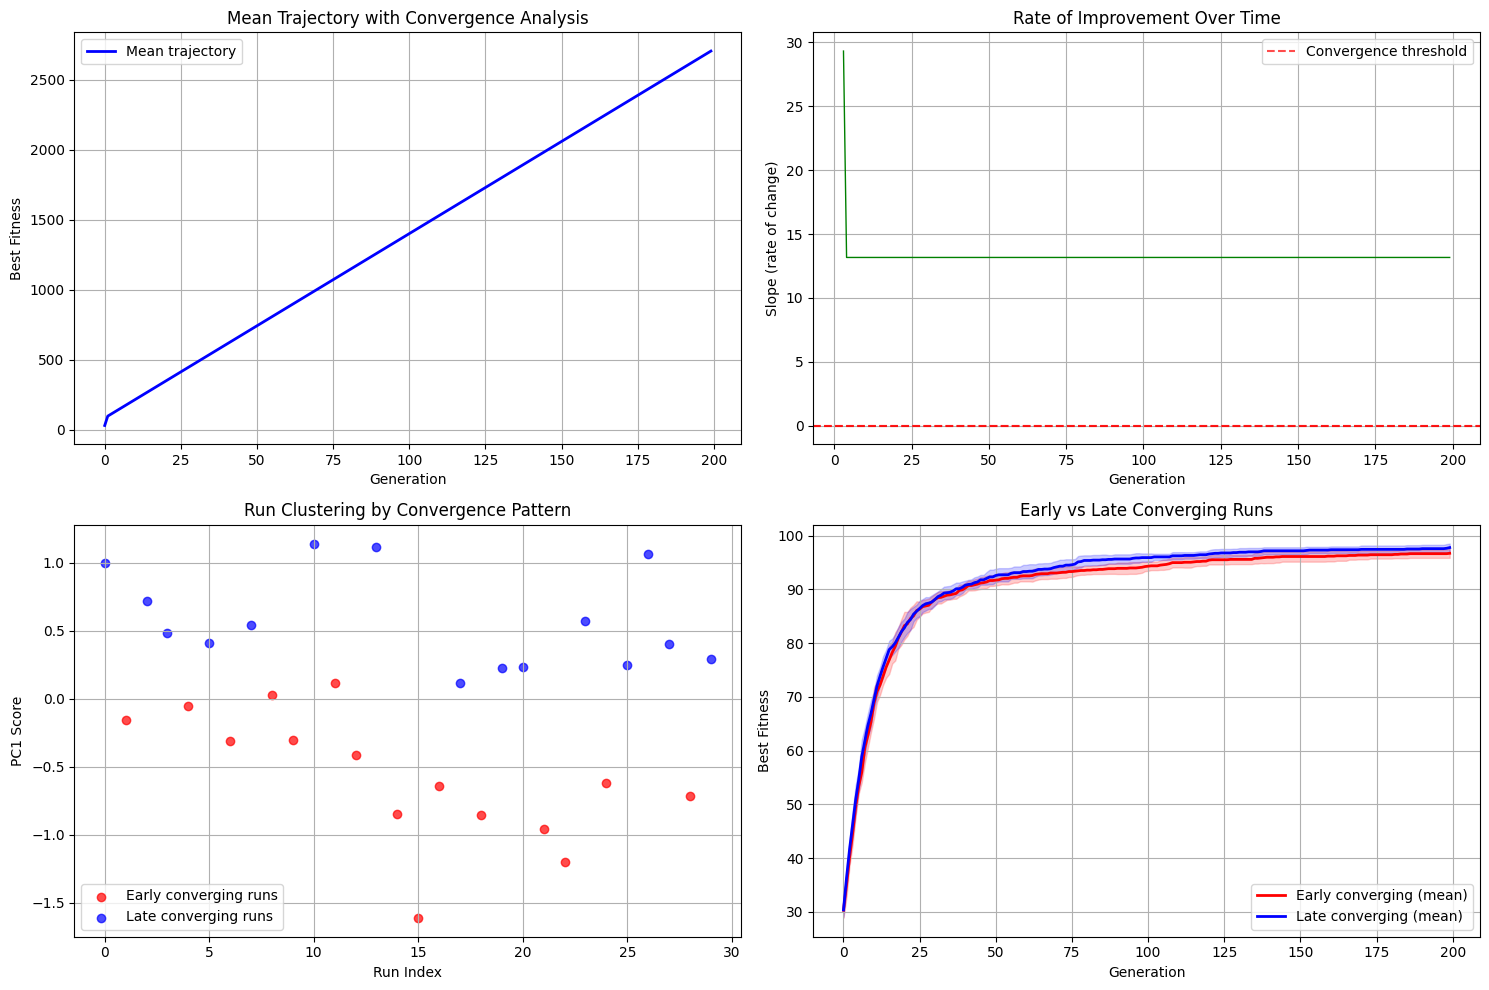

🔍 CONVERGENCE ANALYSIS RESULTS:
✅ No significant premature convergence detected

📊 STAGNATION PERIODS:
   None detected

🧬 RUN CLUSTERING:
   Early converging runs: 15
   Late converging runs: 15

📈 VARIANCE EXPLAINED BY PCs:
   PC1: 0.342 (34.2%)
   PC2: 0.194 (19.4%)
   PC3: 0.167 (16.7%)

🎯 KEY METRIC: No premature convergence detected


In [25]:
# Display the convergence analysis results
plot_convergence_analysis(convergence_results, history_matrix, 'Best Fitness')

print("🔍 CONVERGENCE ANALYSIS RESULTS:")
print("=" * 50)

if convergence_results['premature_convergence_period']:
    start, end = convergence_results['premature_convergence_period']
    print(f"⚠️  PREMATURE CONVERGENCE DETECTED!")
    print(f"   Convergence started at generation: {start}")
    print(f"   Stagnation period: generations {start}-{end}")
else:
    print("✅ No significant premature convergence detected")

print(f"\n📊 STAGNATION PERIODS:")
if convergence_results['stagnation_periods']:
    for i, (start, end) in enumerate(convergence_results['stagnation_periods']):
        print(f"   Period {i+1}: generations {start}-{end} ({end-start} generations)")
else:
    print("   None detected")

print(f"\n🧬 RUN CLUSTERING:")
print(f"   Early converging runs: {len(convergence_results['early_converging_runs'])}")
print(f"   Late converging runs: {len(convergence_results['late_converging_runs'])}")

print(f"\n📈 VARIANCE EXPLAINED BY PCs:")
for i, var_exp in enumerate(convergence_results['variance_explained'][:3]):
    print(f"   PC{i+1}: {var_exp:.3f} ({var_exp*100:.1f}%)")

if convergence_results['convergence_generation']:
    print(f"\n🎯 KEY METRIC: Premature convergence at generation {convergence_results['convergence_generation']}")
    conv_ratio = convergence_results['convergence_generation'] / history_matrix.shape[1]
    print(f"   This represents {conv_ratio:.1%} of total evolution time")
else:
    print(f"\n🎯 KEY METRIC: No premature convergence detected")

In [26]:
def calculate_convergence_metrics(convergence_results, fd_grid_a: np.ndarray):
    """
    Calculate quantitative metrics for premature convergence analysis.
    """
    n_runs, n_generations = fd_grid_a.shape
    
    metrics = {}
    
    # 1. Convergence Generation Ratio
    if convergence_results['convergence_generation']:
        metrics['convergence_ratio'] = convergence_results['convergence_generation'] / n_generations
    else:
        metrics['convergence_ratio'] = 1.0  # No early convergence
    
    # 2. Stagnation Severity (total generations stagnant / total generations)
    total_stagnant = sum(end - start for start, end in convergence_results['stagnation_periods'])
    metrics['stagnation_severity'] = total_stagnant / n_generations
    
    # 3. Run Heterogeneity (how much runs differ in convergence behavior)
    pc1_scores = convergence_results['pc1_scores']
    metrics['run_heterogeneity'] = np.std(pc1_scores) / np.abs(np.mean(pc1_scores)) if np.mean(pc1_scores) != 0 else 0
    
    # 4. Early vs Late Performance Gap
    early_runs = convergence_results['early_converging_runs']
    late_runs = convergence_results['late_converging_runs']
    
    early_final = np.mean(fd_grid_a[early_runs, -1])  # Final generation performance
    late_final = np.mean(fd_grid_a[late_runs, -1])
    metrics['performance_gap'] = abs(late_final - early_final) / max(early_final, late_final)
    
    # 5. Convergence Speed (how fast the mean curve reaches 90% of final value)
    mean_values = convergence_results['mean_function_values']
    final_value = mean_values[-1]
    initial_value = mean_values[0]
    target_value = initial_value + 0.9 * (final_value - initial_value)
    
    convergence_90_gen = None
    for i, val in enumerate(mean_values):
        if val >= target_value:
            convergence_90_gen = i
            break
    
    metrics['convergence_90_ratio'] = convergence_90_gen / n_generations if convergence_90_gen else 1.0
    
    return metrics

# Calculate comprehensive convergence metrics
conv_metrics = calculate_convergence_metrics(convergence_results, history_matrix)

print("📊 QUANTITATIVE CONVERGENCE METRICS:")
print("=" * 50)
print(f"🎯 Convergence Ratio: {conv_metrics['convergence_ratio']:.3f}")
print(f"   (0.0 = immediate convergence, 1.0 = no premature convergence)")

print(f"\n⏱️  Stagnation Severity: {conv_metrics['stagnation_severity']:.3f}")
print(f"   (fraction of total evolution time spent stagnant)")

print(f"\n🔄 Run Heterogeneity: {conv_metrics['run_heterogeneity']:.3f}")
print(f"   (coefficient of variation in convergence patterns)")

print(f"\n📈 Performance Gap: {conv_metrics['performance_gap']:.3f}")
print(f"   (relative difference between early/late converging runs)")

print(f"\n⚡ 90% Convergence Ratio: {conv_metrics['convergence_90_ratio']:.3f}")
print(f"   (fraction of evolution time to reach 90% of final performance)")

# Interpretation guidelines
print(f"\n🔍 INTERPRETATION GUIDELINES:")
print(f"   • Convergence Ratio < 0.3: Severe premature convergence")
print(f"   • Convergence Ratio < 0.5: Moderate premature convergence") 
print(f"   • Stagnation Severity > 0.3: High stagnation")
print(f"   • Run Heterogeneity > 1.0: High variability in convergence patterns")
print(f"   • Performance Gap > 0.1: Significant difference between convergence groups")

📊 QUANTITATIVE CONVERGENCE METRICS:
🎯 Convergence Ratio: 1.000
   (0.0 = immediate convergence, 1.0 = no premature convergence)

⏱️  Stagnation Severity: 0.000
   (fraction of total evolution time spent stagnant)

🔄 Run Heterogeneity: 1837643994482778.500
   (coefficient of variation in convergence patterns)

📈 Performance Gap: 0.011
   (relative difference between early/late converging runs)

⚡ 90% Convergence Ratio: 0.895
   (fraction of evolution time to reach 90% of final performance)

🔍 INTERPRETATION GUIDELINES:
   • Convergence Ratio < 0.3: Severe premature convergence
   • Convergence Ratio < 0.5: Moderate premature convergence
   • Stagnation Severity > 0.3: High stagnation
   • Run Heterogeneity > 1.0: High variability in convergence patterns
   • Performance Gap > 0.1: Significant difference between convergence groups
